<a href="https://colab.research.google.com/github/itsmesudhanshu/Cardiovascular-risk-prediction/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coronavirus Tweet Sentiment Analysis**
##Project Type - Classification
##Contribution - Team
### Team member 1 : Sudhanshu Chouhan
### Team member 2 : Kapil Narayan Singh













Import libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix as cm  
from sklearn.metrics import classification_report as cr  
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.utils import shuffle
import pylab as p



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data= pd.read_csv('/content/drive/MyDrive/coronavirus sentiment/Coronavirus Tweets.csv', encoding="ISO-8859-1")

     

# Dataset First View

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


##Dataset Rows and Columns count

In [11]:
data.shape

(41157, 6)

## Dataset Information

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## Duplicate Values

In [13]:
data.duplicated().sum()

0

##Missing Values/Null Values Count

In [14]:
data.isna().sum().sort_values(ascending = False).head()

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
dtype: int64

<AxesSubplot:>

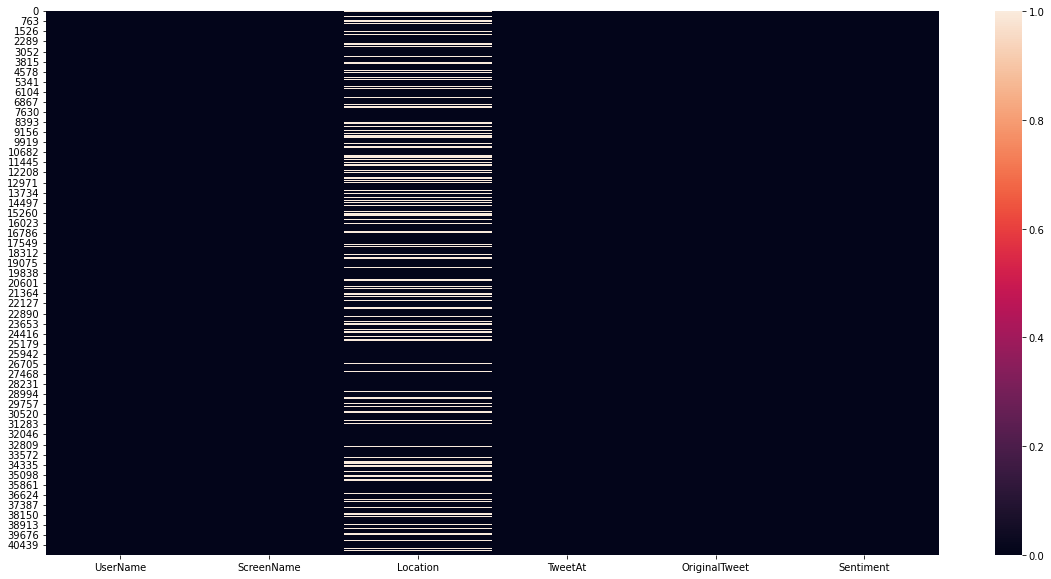

In [15]:
# let's plot a Heatmap to check the Nan values
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

## Knowing Dataset

##2.Understanding Variables

In [16]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [17]:
data.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


Variable Description
1.Username is Coded Username

2.ScreenName is Coded Screen name

3.Location is Region of origin of tweet.

4.Tweet at is Tweet timing.

5.OriginalTweet is First tweet in the thread.

6.Sentiment which is target Variable.

##Checking Unique values for each Variables.

In [18]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [19]:
data.Location.nunique()

12220

From this we get to know that unique value is relevant for only sentiment column or target variable.

#Data Wrangling

##Data Wrangling Code

In [20]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


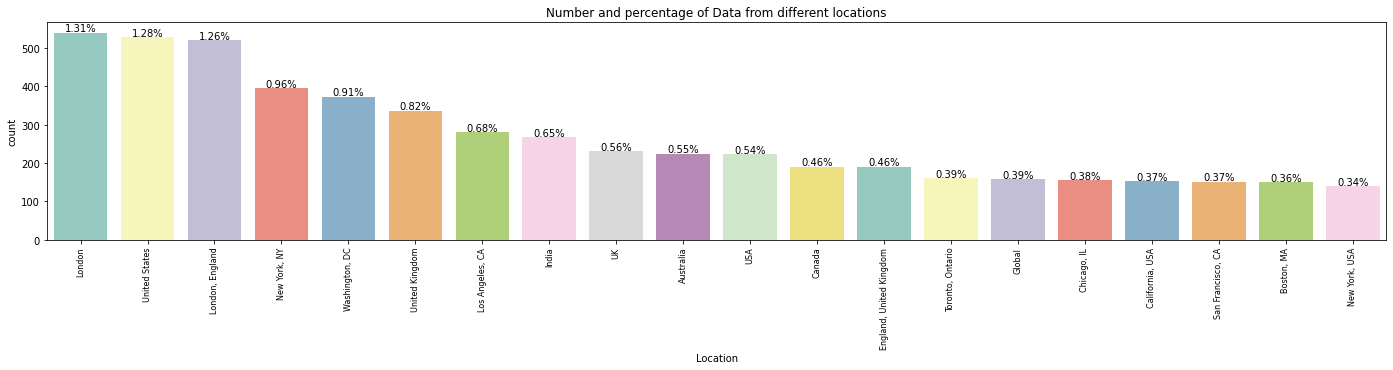

In [21]:
# Percentage of data from different locations
data_source("Location", "Data from different locations", data, 6)
     

The above observation shows that the number of data percentage wise from each country that of total data present.

In [22]:
# Plot unique value across different colums
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe
     

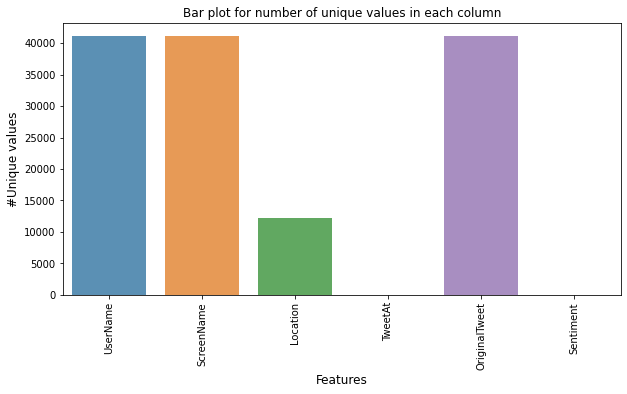

In [23]:
unique_data = unique_values(data)
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=unique_data['Features'], y=unique_data['Uniques'], alpha=0.8)
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The number of unique value in different feature are as followed Username , ScreenName , OriginalTweet has unique values of around 40000 then followed by Location that is between 10000-15000. 

#Sample text of Sentiment.

In [53]:
data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

##Here we can see that the number of positive sentiment is highest.

In [48]:
data[data['Sentiment'] == 'Neutral']['OriginalTweet'].sample(10)

18241    Tomorrow night at 6pm AEDT Profs Peter Wark &a...
15863    #dirkvandenbroek Vakkenvuller naar huis gestuu...
35       Went to the supermarket yesterday and the toil...
20962    Whenever you touch any object or surface outsi...
4932     @d_odp7 Hahahahahaha! The grocery store was sl...
5157     Just realized something. the majority of death...
1128     For more updates, visit https://t.co/i2ZTA1igt...
10796    @Conrguy @soylentbeige @jaketapper And hereÂs...
501      Consumers Energy is suspending service shutoff...
9777     We are closely tracking the evolving COVID-19 ...
Name: OriginalTweet, dtype: object

In [49]:
data[data['Sentiment'] == 'Extremely Positive']['OriginalTweet'].sample(10)

22099    Wow, Aetna just announced that their policyhol...
35765    As people prepare to stay home for an extended...
34358    My God. Has it truly come to this? #coronaviru...
6954     As we have seen prices for hand sanitizer, soa...
14058    Unconventional COVID-19 stock shortages at my ...
24396    #toiletpaper are live savers. lol \r\r\nWe fen...
3786     Strongly believe itÂs a lot lot lot less than...
10518    @Lady_MeuMeu The stocks were sold *before* the...
20886    Are there any #VolunteersAgainstCovid19 in St ...
36871    Sharing a quick alert from the Federal Trade C...
Name: OriginalTweet, dtype: object

In [50]:
data[data['Sentiment'] == 'Positive']['OriginalTweet'].sample(10)

14390    Despite now having some of the toughest measur...
33959    The D C Council on Tuesday unanimously passed ...
13303    How is #positivethinking working for others? I...
10514    the new play Cannabis sales and prices are sky...
276      For the love people \r\r\nIf you have to retur...
15674    Albert Heijn (franchise) supermarket / conveni...
16172    @WeAreTheMU @thecloneroses @Holbornlolz  The m...
28272    Take a look at this quick survey on telehealth...
33642    The graph we all wanted to see: toilet paper s...
921      In resonse to COVID-19, the Amani Chattanooga ...
Name: OriginalTweet, dtype: object

In [51]:
data[data['Sentiment'] == 'Extremely Negative']['OriginalTweet'].sample(10)

23632    Man from old country laments finding the same ...
36491    Companies make inventory losses in a falling m...
29308    @MattHancock Govt needs to be stricter regardi...
36880    "No company expected to go into a global lockd...
16106    Mini UV Sanitizer Wand USB Charging Ultra Viol...
2282     If your in a supermarket fighting over toilet ...
31543    Outside food consumption changes other behavio...
37524    Farmers Dump Milk, Break Eggs as Restaurant Cl...
7607     As a result of the recent global economic chal...
7006     I can deal with COVID 19 and how it is progres...
Name: OriginalTweet, dtype: object

In [52]:
data[data['Sentiment'] == 'Negative']['OriginalTweet'].sample(10)

7673     Cyclone ultralow volume  Now We Can Use To Eli...
9023     Tillman says this will help buyers and supplie...
16576    @CDCgov And seriously, leave your kids home if...
12698    Toronto is in a full lockdown and Canada has p...
26277    NEW Episode We give you the lowdown on working...
11184    @MissStixy Maybe this is why thereÂs a shorta...
9286     A passionate plea from an NHS worker, who says...
810      For those who aren't in panic mode yet, when w...
12354    @Dannysmith1878 @thechicoazul @KeefTommo Fucki...
28933    Hospitals, governments, do-gooders and huckste...
Name: OriginalTweet, dtype: object

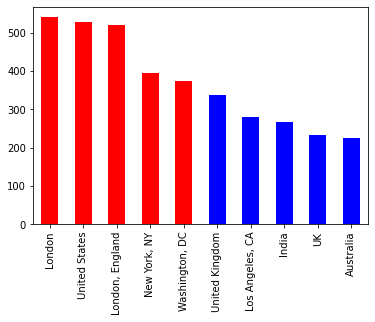

In [75]:
from matplotlib.figure import figaspect
country_location = data['Location'].value_counts().index

colors_location = ['red' if (x in country_location[:5]) else 'blue' for x in country_location]


data['Location'].value_counts()[0:10].plot(kind='bar',alpha =1,color=colors_location);


In [76]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 6.3 MB/s eta 0:00:00


In [77]:
import neattext.functions as nfx

In [78]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [85]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_urls)


In [88]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
3977,So I did NOT stockpile food or anything. But n...,So I did NOT stockpile food or anything. But n...
7865,ÂThe Government must urgently consider offeri...,ÂThe Government must urgently consider offeri...
28261,@GovEvers Why are you in such a panic about t...,@GovEvers Why are you in such a panic about t...
3333,Amid signals efforts to continue mission and e...,Amid signals efforts to continue mission and e...
5025,"""#Saudi Arabia is bracing for an economic down...","""#Saudi Arabia is bracing for an economic down..."
9545,Significant development in Italy re 19 as supe...,Significant development in Italy re 19 as supe...
13384,Should slash their submission prices in light ...,Should slash their submission prices in light ...
6390,With COVID-19 notifications filling our inboxe...,With COVID-19 notifications filling our inboxe...
19405,Are you suffering financial hardship due to #c...,Are you suffering financial hardship due to #c...
32280,Ready to cross off a few items from your shopp...,Ready to cross off a few items from your shopp...


In [89]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_numbers)

In [90]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
21711,Supermarket in Switzerland remains fully stock...,Supermarket in Switzerland remains fully stock...
11323,Thanks Gran..\r\r\n\r\r\n#StopHoarding #Corona...,Thanks Gran..\r\r\n\r\r\n#StopHoarding #Corona...
22807,Live #coronavirus updates:\r\r\n\r\r\n- Unempl...,Live #coronavirus updates:\r\r\n\r\r\n- Unempl...
18847,Grocery store shopping today...my new normal. ...,Grocery store shopping today...my new normal. ...
32132,Here's a simple way to make yourself a mask fo...,Here's a simple way to make yourself a mask fo...
27818,This #COVID2019 tracker by @Emarsys and @goodd...,This #COVID tracker by @Emarsys and @gooddata ...
15793,@realDonaldTrump \r\r\nThe government needs to...,@realDonaldTrump \r\r\nThe government needs to...
40949,By attempting to protect consumers from higher...,By attempting to protect consumers from higher...
33076,One good thing about this COVID-19 is that I h...,One good thing about this COVID- is that I had...
38678,showing the world exactly how I felt when some...,showing the world exactly how I felt when some...


In [91]:
data['neat_tweet'] = data['OriginalTweet'].str.lower()

In [92]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
19436,Ireland Where eventually it always comes back ...,ireland where eventually it always comes back ...
12433,We are happy to provide relief to the traders ...,we are happy to provide relief to the traders ...
35656,Wearing a cloth face covering CORRECTLY can he...,wearing a cloth face covering correctly can he...
27323,Shehbaz Sharif demands fuel prices to be reduc...,shehbaz sharif demands fuel prices to be reduc...
162,COVID-19 RETAIL EDITION \r\r\nfitting rooms cl...,covid-19 retail edition \r\r\nfitting rooms cl...
21561,On the 3rd day of StayAtHome my true love gave...,on the 3rd day of stayathome my true love gave...
23372,If there are any products that claim to treat ...,if there are any products that claim to treat ...
40188,Grocery chains have been interesting to watch ...,grocery chains have been interesting to watch ...
19810,Two shoppers wait for a store to open to buy s...,two shoppers wait for a store to open to buy s...
2111,#Coronavirus \r\r\nDidnÂt panic buy. Will now...,#coronavirus \r\r\ndidnât panic buy. will now...
